# MNIST Classifier

### Building an Artificial Neural Network to classify MNIST handwritten digits

#### Set seed for reporoducibility

In [1]:
import numpy as np
np.random.seed(42)

#### Load dependencies

In [23]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import random
from ipywidgets import widgets

#### Load data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
x_sample = X_test
y_sample = y_test

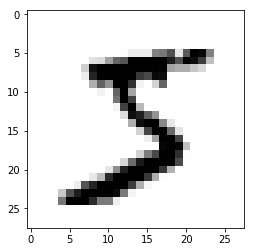

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()
print(X_train[0])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[0:99]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3], dtype=uint8)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

#### Preprocess data

In [11]:
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

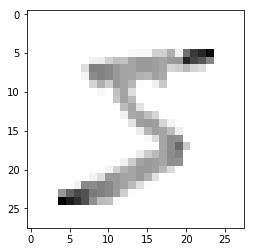

In [12]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [13]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [14]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

#### Design neural network architecture

In [15]:
model = Sequential()
model.add(Dense((64), activation='relu', input_shape=(784, )))
model.add(Dense((64), activation='relu'))
model.add(Dense((10), activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


#### Configure model

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

#### Training the model

In [18]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.7227 - acc: 0.8106 - val_loss: 0.3350 - val_acc: 0.9045
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2983 - acc: 0.9140 - val_loss: 0.2694 - val_acc: 0.9235
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2398 - acc: 0.9304 - val_loss: 0.2146 - val_acc: 0.9368
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2016 - acc: 0.9414 - val_loss: 0.1900 - val_acc: 0.9454
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1747 - acc: 0.9489 - val_loss: 0.1735 - val_acc: 0.9482
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1538 - acc: 0.9549 - val_loss: 0.1517 - val_acc: 0.9565
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.1376 - acc: 0.9597 - val_loss: 0.1399 - val_acc

In [19]:
predictions = model.predict(X_test)

In [20]:
print(predictions)

[[6.42813802e-07 5.55107022e-07 1.24081198e-04 ... 9.99569237e-01
  1.23440907e-06 1.23021055e-05]
 [6.61569402e-06 4.59103333e-03 9.94129896e-01 ... 4.33791447e-09
  1.99811052e-06 4.63913519e-10]
 [1.84268146e-07 9.99271929e-01 9.54645511e-05 ... 4.12679910e-05
  3.89199995e-04 2.25907593e-06]
 ...
 [2.92283545e-07 1.74593811e-06 2.29535135e-06 ... 2.90380238e-04
  7.00790770e-05 6.08461967e-04]
 [7.24133861e-05 2.08608235e-05 7.73024667e-08 ... 1.23843290e-06
  1.87097336e-04 3.87582048e-07]
 [1.47381716e-05 3.47926004e-07 2.32793784e-04 ... 1.09766374e-08
  1.80266468e-07 7.27426008e-10]]


Button(description='Click me', style=ButtonStyle())

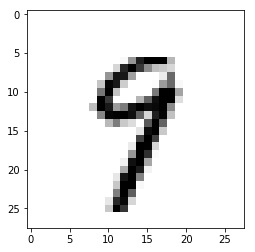

Actual digit: 9
Prediction: 9


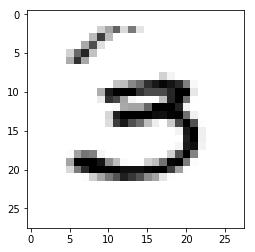

Actual digit: 3
Prediction: 3


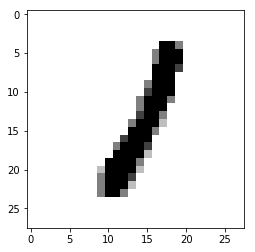

Actual digit: 1
Prediction: 1


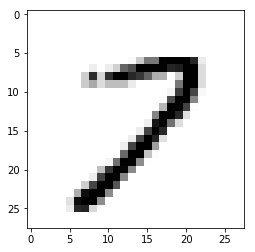

Actual digit: 7
Prediction: 7


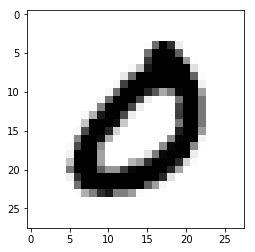

Actual digit: 0
Prediction: 0


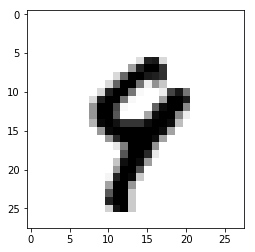

Actual digit: 9
Prediction: 9


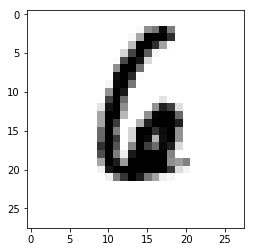

Actual digit: 6
Prediction: 6


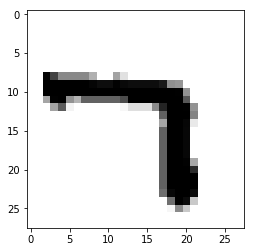

Actual digit: 7
Prediction: 7


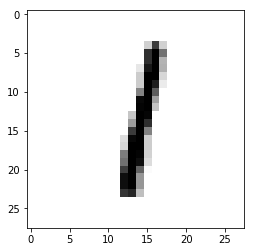

Actual digit: 1
Prediction: 1


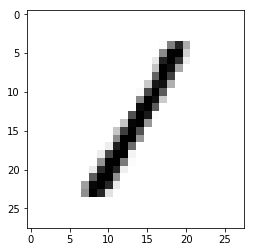

Actual digit: 1
Prediction: 1


In [30]:
button = widgets.Button(description = "Click me")
display(button)

In [31]:
def on_button_clicked(b):
    digit = random.randint(0, 10000)
    plt.imshow(x_sample[digit], cmap=plt.cm.binary)
    plt.show()
    print("Actual digit: " + str(y_sample[digit]))
    print("Prediction: " + str(np.argmax(predictions[digit])))

button.on_click(on_button_clicked)